In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import seaborn as sns

In [2]:
PATH = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/customers_data.csv'
df = pd.read_csv(PATH)

In [3]:
df.head()

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,0,19.58,male,no,31.0,35.0,False
1,1,65.16,male,yes,23.0,61.0,False
2,2,40.60,female,no,36.0,49.0,False
3,3,38.01,male,yes,47.0,57.0,False
4,4,22.32,female,yes,5.0,39.0,False


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 6 columns):
purch_amt                120000 non-null float64
gender                   120000 non-null object
card_on_file             120000 non-null object
age                      120000 non-null float64
days_since_last_purch    120000 non-null float64
loyalty                  120000 non-null bool
dtypes: bool(1), float64(3), object(2)
memory usage: 4.7+ MB


In [56]:
print('Dominant Class Rate (Percent Loyal): ', len(df[df.loyalty==False]) / len(df))
print('Percent Not Loyal: ', len(df[df['loyalty']==True]) / len(df))

Dominant Class Rate (Percent Loyal):  0.8333333333333334
Percent Not Loyal:  0.16666666666666666


In [10]:
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def knn_weighted(X, y, n):
    for each in cat_var_:
        le = LabelEncoder()
        le_fit = le.fit(X[each])
        le_transform = le.transform(df[each])
        X[each] = le_transform
    X = StandardScaler().fit_transform(X)
    offset = int(X.shape[0] * 0.9)
    X_train, y_train = X[:offset], y[:offset]
    X_test, y_test = X[offset:], y[offset:]
    knn = neighbors.KNeighborsClassifier(n_neighbors=n, weights='distance')
    fit = knn.fit(X_train, y_train)
    pred= knn.predict(X_test)
    score = knn.score(X_test, y_test)
    cm = confusion_matrix(y_test, pred)
    fig, ax = plt.subplots()
    im = ax.matshow(cm)
    for (i, j), z in np.ndenumerate(cm):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', 
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    plt.title('Confusion matrix')
    fig.colorbar(im)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    class_rep = classification_report(y_test, pred)
    print('\nClassification Report: \n', class_rep)
    print("Percent of CORRECTLY labeled points out of a total {} points : {}".format(
    len(y_test),
    (1 - (y_test != pred).sum() / len(y_test)) * 100))

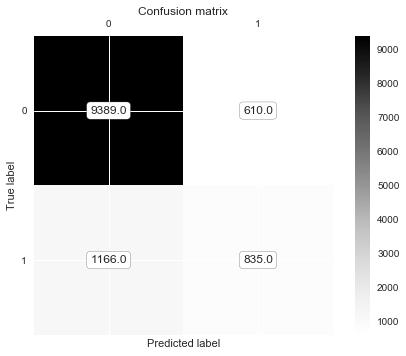


Classification Report: 
              precision    recall  f1-score   support

      False       0.89      0.94      0.91      9999
       True       0.58      0.42      0.48      2001

avg / total       0.84      0.85      0.84     12000

Percent of CORRECTLY labeled points out of a total 12000 points : 85.2


In [12]:
cat_var_ = ['gender', 'card_on_file']
X = df.drop('loyalty', axis=1)
y = df['loyalty']

knn_weighted(X, y, 10)

In [35]:
from sklearn.model_selection import cross_val_score

# cross-validate
knn = neighbors.KNeighborsClassifier(n_neighbors=10, weights='distance')
knn_cv = cross_val_score(knn, X, y, scoring='accuracy', cv=3)
print('Cross-validated Scores: \n', knn_cv)
print('\nMean Accuracy of Cross-Validated Scores: %0.2f (+/- %0.2f)' % (knn_cv.mean(), knn_cv.std() * 2))

Cross-validated Scores: 
 [ 0.85402865  0.854975    0.85764644]

Mean Accuracy of Cross-Validated Scores: 0.86 (+/- 0.00)


In [74]:
from sklearn import ensemble

def ranfor_class(X, y, n_est, max_dep):
    offset = int(X.shape[0] * 0.9)
    X_train, y_train = X[:offset], y[:offset]
    X_test, y_test = X[offset:], y[offset:]
    rfc = ensemble.RandomForestClassifier(n_estimators=n_est, max_depth=max_dep)
    rfc_fit = rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    rfc_score = rfc.score(X_test, y_test)
    cm = confusion_matrix(y_test, rfc_pred)
    fig, ax = plt.subplots()
    im = ax.matshow(cm)
    for (i, j), z in np.ndenumerate(cm):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', 
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    plt.title('Confusion matrix')
    fig.colorbar(im)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    class_rep = classification_report(y_test, rfc_pred)
    print('\nClassification Report: \n', class_rep)
    print("Percent of CORRECTLY labeled points out of a total {} points : {}".format(
    len(y_test),
    (1 - (y_test != rfc_pred).sum() / len(y_test)) * 100))
    # Make importances relative to max importance
    feature_importance = rfc.feature_importances_
    feature_importance = 100 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) +  0.5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative importance')
    plt.ylabel('Variable importance')
    plt.show()

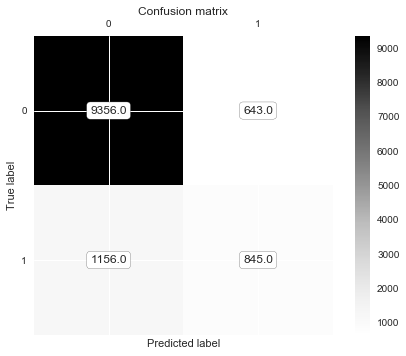


Classification Report: 
              precision    recall  f1-score   support

      False       0.89      0.94      0.91      9999
       True       0.57      0.42      0.48      2001

avg / total       0.84      0.85      0.84     12000

Percent of CORRECTLY labeled points out of a total 12000 points : 85.00833333333333


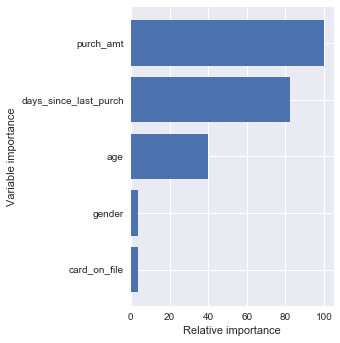

In [39]:
ranfor_class(X, y, 500, None)

In [52]:
# cross-validate
rfc = ensemble.RandomForestClassifier(n_estimators=500, max_depth=None)
rfc_cv = cross_val_score(rfc, X, y, scoring='accuracy', cv=3)
print('Cross-validated Scores: \n', rfc_cv)
print('\nMean Accuracy of Cross-Validated Scores: %0.2f (+/- %0.2f)' % (rfc_cv.mean(), rfc_cv.std() * 2))

Cross-validated Scores: 
 [ 0.8518037   0.851075    0.85292132]

Mean Accuracy of Cross-Validated Scores: 0.85 (+/- 0.00)


In [47]:
from sklearn.svm import SVC

def svc(X, y):
    X = StandardScaler().fit_transform(X)
    offset = int(X.shape[0] * 0.9)
    X_train, y_train = X[:offset], y[:offset]
    X_test, y_test = X[offset:], y[offset:]
    clf = SVC()
    fit = clf.fit(X_train, y_train)
    pred= clf.predict(X_test)
    score = clf.score(X_test, y_test)
    cm = confusion_matrix(y_test, pred)
    fig, ax = plt.subplots()
    im = ax.matshow(cm)
    for (i, j), z in np.ndenumerate(cm):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', 
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    plt.title('Confusion matrix')
    fig.colorbar(im)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    class_rep = classification_report(y_test, pred)
    print('\nClassification Report: \n', class_rep)
    print("Percent of CORRECTLY labeled points out of a total {} points : {}".format(
    len(y_test),
    (1 - (y_test != pred).sum() / len(y_test)) * 100))

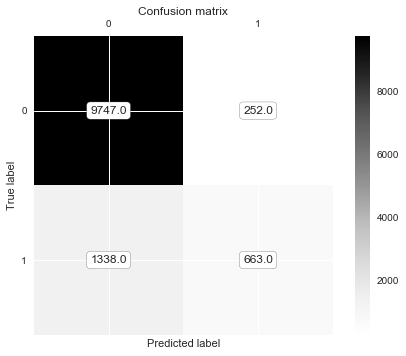


Classification Report: 
              precision    recall  f1-score   support

      False       0.88      0.97      0.92      9999
       True       0.72      0.33      0.45      2001

avg / total       0.85      0.87      0.85     12000

Percent of CORRECTLY labeled points out of a total 12000 points : 86.75


In [48]:
svc(X, y)

In [53]:
# cross-validate
clf = SVC()
clf_cv = cross_val_score(clf, X, y, scoring='accuracy', cv=3)
print('Cross-validated Scores: \n', clf_cv)
print('\nMean Accuracy of Cross-Validated Scores: %0.2f (+/- %0.2f)' % (clf_cv.mean(), clf_cv.std() * 2))

Cross-validated Scores: 
 [ 0.85435364  0.853475    0.85747144]

Mean Accuracy of Cross-Validated Scores: 0.86 (+/- 0.00)


In [49]:
def gb_class(X, y, los, n, md):
    offset = int(X.shape[0] * 0.9)
    X_train, y_train = X[:offset], y[:offset]
    X_test, y_test = X[offset:], y[offset:]
    gbc = ensemble.GradientBoostingClassifier(loss=los, n_estimators=n, max_depth=md)
    gbc_fit = gbc.fit(X_train, y_train)
    gbc_pred = gbc.predict(X_test)
    gbc_score = gbc.score(X_test, y_test)
    cm = confusion_matrix(y_test, gbc_pred)
    fig, ax = plt.subplots()
    im = ax.matshow(cm)
    for (i, j), z in np.ndenumerate(cm):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', 
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    plt.title('Confusion matrix')
    fig.colorbar(im)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    class_rep = classification_report(y_test, gbc_pred)
    print('\nClassification Report: \n', class_rep)
    print("Percent of CORRECTLY labeled points out of a total {} points : {}".format(
    len(y_test),
    (1 - (y_test != gbc_pred).sum() / len(y_test)) * 100
))
    
    # Make importances relative to max importance
    feature_importance = gbc.feature_importances_
    feature_importance = 100 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) +  0.5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative importance')
    plt.ylabel('Variable importance')
    plt.show()

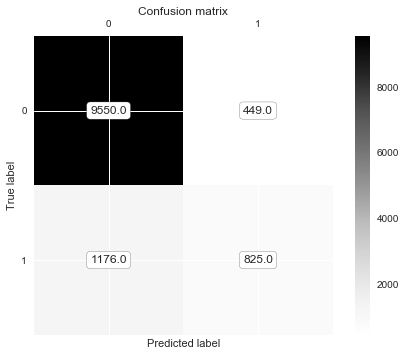


Classification Report: 
              precision    recall  f1-score   support

      False       0.89      0.96      0.92      9999
       True       0.65      0.41      0.50      2001

avg / total       0.85      0.86      0.85     12000

Percent of CORRECTLY labeled points out of a total 12000 points : 86.45833333333334


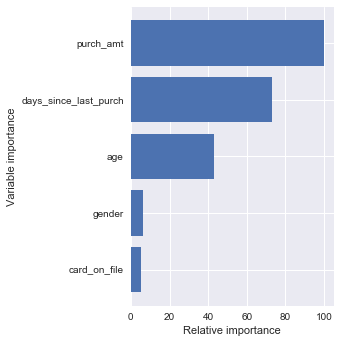

In [50]:
gb_class(X, y, 'deviance', 500, 5)

In [57]:
# cross-validate
gbc = ensemble.GradientBoostingClassifier(loss='deviance', n_estimators=500, max_depth=5)
gbc_cv = cross_val_score(gbc, X, y, scoring='accuracy', cv=3)
print('Cross-validated Scores: \n', gbc_cv)
print('\nMean Accuracy of Cross-Validated Scores: %0.2f (+/- %0.2f)' % (gbc_cv.mean(), gbc_cv.std() * 2))

Cross-validated Scores: 
 [ 0.86287843  0.8636      0.86432161]

Mean Accuracy of Cross-Validated Scores: 0.86 (+/- 0.00)


# Try to identify features that will strongly identify the minority class

In [58]:
df.columns

Index(['purch_amt', 'gender', 'card_on_file', 'age', 'days_since_last_purch',
       'loyalty'],
      dtype='object')

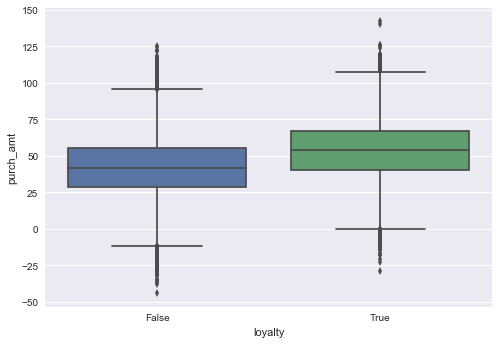

In [64]:
sns.boxplot('loyalty', 'purch_amt', data=df)

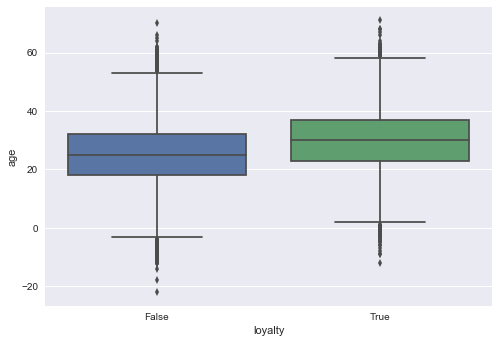

In [67]:
sns.boxplot('loyalty', 'age', data=df)

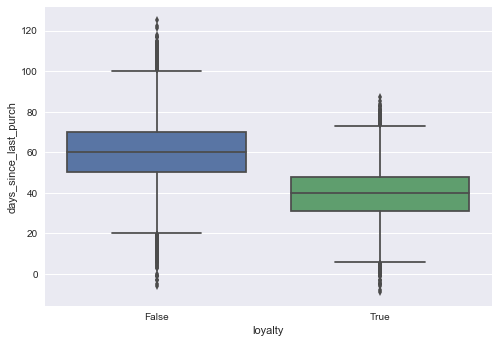

In [68]:
sns.boxplot('loyalty', 'days_since_last_purch', data=df)

In [65]:
df[df['loyalty']==True].describe()

,purch_amt,age,days_since_last_purch
count,20000.000000,20000.000000,20000.000000
mean,53.933842,29.890900,39.824000
std,20.072442,10.037736,12.539896
min,-28.830000,-12.000000,-9.000000
25%,40.450000,23.000000,31.000000
50%,54.170000,30.000000,40.000000
75%,67.412500,37.000000,48.000000
max,142.200000,71.000000,87.000000


In [66]:
df[df['loyalty']==False].describe()

,purch_amt,age,days_since_last_purch
count,100000.000000,100000.000000,100000.000000
mean,42.056712,24.985430,59.962290
std,19.972280,9.977023,14.986174
min,-43.950000,-22.000000,-6.000000
25%,28.660000,18.000000,50.000000
50%,41.990000,25.000000,60.000000
75%,55.570000,32.000000,70.000000
max,125.530000,70.000000,125.000000


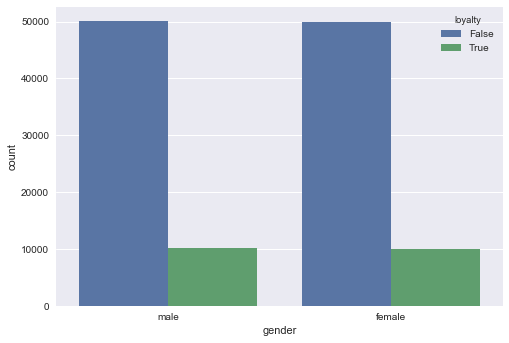

In [69]:
sns.countplot(x='gender', hue='loyalty', data=df)

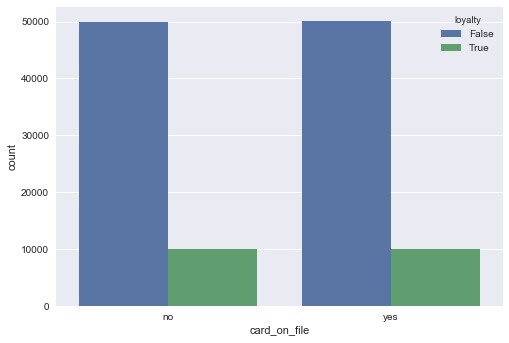

In [70]:
sns.countplot(x='card_on_file', hue='loyalty', data=df)

In [71]:
# Engineer new features
df['recent_purchaser'] = np.where(df['days_since_last_purch'] < 50, 1, 0)

# Retry the models

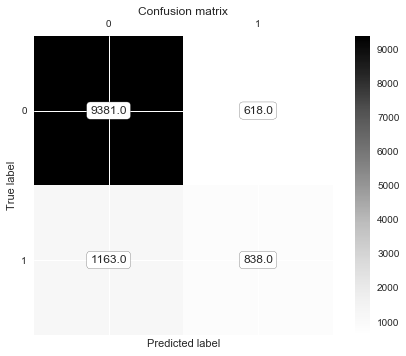


Classification Report: 
              precision    recall  f1-score   support

      False       0.89      0.94      0.91      9999
       True       0.58      0.42      0.48      2001

avg / total       0.84      0.85      0.84     12000

Percent of CORRECTLY labeled points out of a total 12000 points : 85.15833333333333


In [72]:
cat_var_ = ['gender', 'card_on_file']
X = df.drop('loyalty', axis=1)
y = df['loyalty']

knn_weighted(X, y, 10)

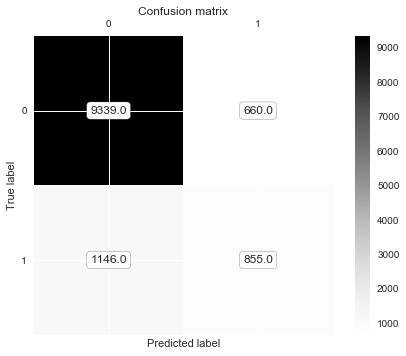


Classification Report: 
              precision    recall  f1-score   support

      False       0.89      0.93      0.91      9999
       True       0.56      0.43      0.49      2001

avg / total       0.84      0.85      0.84     12000

Percent of CORRECTLY labeled points out of a total 12000 points : 84.95


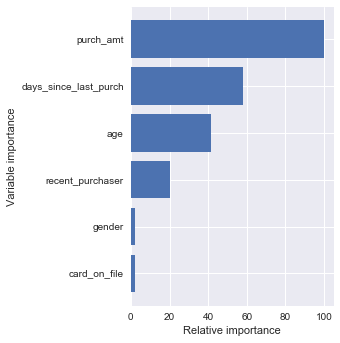

In [75]:
ranfor_class(X, y, 500, None)

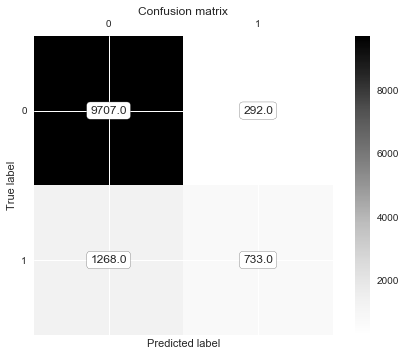


Classification Report: 
              precision    recall  f1-score   support

      False       0.88      0.97      0.93      9999
       True       0.72      0.37      0.48      2001

avg / total       0.86      0.87      0.85     12000

Percent of CORRECTLY labeled points out of a total 12000 points : 87.0


In [76]:
svc(X, y)

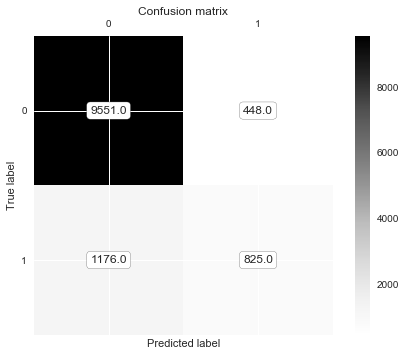


Classification Report: 
              precision    recall  f1-score   support

      False       0.89      0.96      0.92      9999
       True       0.65      0.41      0.50      2001

avg / total       0.85      0.86      0.85     12000

Percent of CORRECTLY labeled points out of a total 12000 points : 86.46666666666667


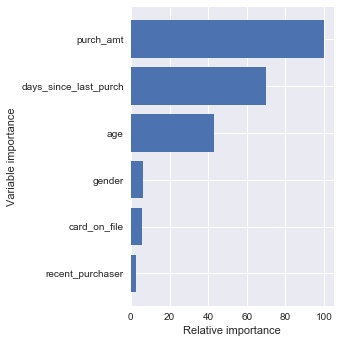

In [77]:
gb_class(X, y, 'deviance', 500, 5)